## Motivation
show some features of sklearn to train a model, cross-validate a model result, optimize a classifier, check for overfitting.

I will use the Iris dataset and Knn classifier for simplicity

In [37]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
import time
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

# import iris dataset
from sklearn import datasets

In [38]:
# get Iris dataset and save it into X,y samples
iris = datasets.load_iris()
X = iris.data
y = iris.target
print X.shape
print y.shape

(150, 4)
(150,)


In [39]:
# next we define the Knn classifier, not optimization here
knn = KNeighborsClassifier()
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [40]:
# we split the X, y smapes into training/testing samples
# the idea is to train a classifier on the training sample, then to evaluate its accuracy on the testing sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [41]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(90, 4)
(60, 4)
(90,)
(60,)


In [42]:
# fit the model with data
knn.fit(X_train, y_train)

# store the predicted response values
y_pred = knn.predict(X_test)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred)

0.983333333333


In [43]:
# fit the model with data
knn.fit(X, y)

# store the predicted response values
y_pred = knn.predict(X)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.966666666667


<b>Comments</b> :

sklearn has a method to do the cross-validation (ie splitting dataser into training and testing sample)
<br>
The issue with train_test_split being that it will provide a high-variance estimate of out-of-sample accuracy.
<br>
<font color="red">KFold cross_validation </font>: the method is called cross_val_score and perform the training/testing splitting k times, meaning that:
<ol>
<li>each X, y datasets are split into k equal parts
<li>the training/testing is done k time, each time by switching a folkd for the testing part
</ol>

In [44]:
scores = cross_validation.cross_val_score(knn, X, y,cv=10)
print('CV scores :%s' % scores)
print('CV accurancy :%.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV scores :[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
CV accurancy :0.967 +/- 0.045


<b>Bonus</b> : Another useful feature of sklearn is to plot the training accuracy (so using the full X, y datasets) 
and the cross_validated accuracy (result of cv). This can be helpful to see the effect of training sizes on both accuracy.
It is indeed epected that the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases.

In [45]:
train_sizes, train_scores, test_scores = learning_curve(knn,X,y, train_sizes = np.linspace(0.1,1.0,10),cv=10)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

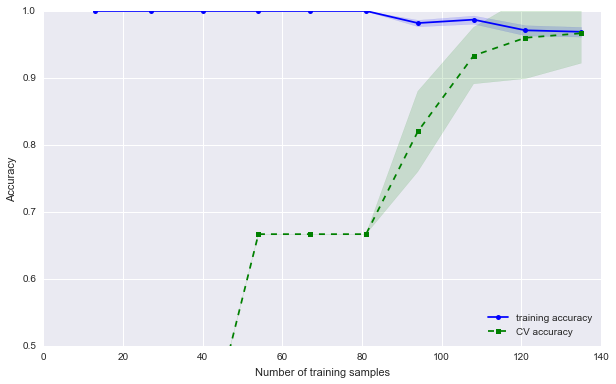

In [46]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green',linestyle='--',marker='s',markersize=5,label='CV accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
#plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1.0])
plt.show()

Cross-Validation is also used when optimizing hyper-parameters by checking which value will give the best testing accuracy.
In our case, I will vary the value of K neighbours of Knn classifiers.

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


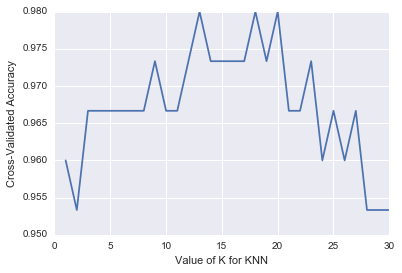

In [47]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

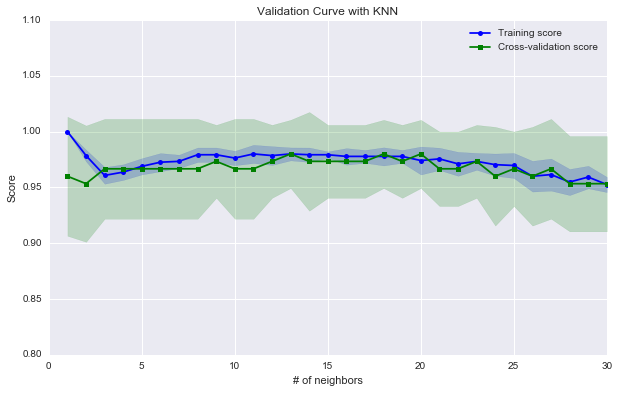

In [51]:
knn = KNeighborsClassifier()
param_range = range(1,31)
train_scores, test_scores = validation_curve(knn, X, y, param_name="n_neighbors", 
                                             param_range=param_range,cv=10, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.title("Validation Curve with KNN")
plt.xlabel("# of neighbors")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.plot(param_range, train_scores_mean, marker='o',markersize=5,label="Training score", color="blue")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(param_range, test_scores_mean, marker='s',markersize=5,label="Cross-validation score",
             color="green")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()